# Data preprocessing
Cleaning data by removing \n characters, then we perform NFD transformation to separate diacritics from the simple characters (except ~) and go back to NFC ([source here](https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l)). This way we converted all characters with diacritics to the simple character. Finally, 5-letter words are saved in a list.

## Letter frequency visualization
Counter object from colletions is used to count the frequency of each letter. Then, a histogram is used to visualize these values.

Counter({'a': 10730, 'e': 6850, 'o': 6194, 'r': 4417, 'i': 3912, 'l': 3262, 's': 3218, 'n': 2919, 'c': 2781, 'u': 2621, 't': 2462, 'p': 1982, 'm': 1867, 'd': 1775, 'b': 1462, 'g': 1245, 'f': 926, 'h': 914, 'j': 882, 'v': 846, 'z': 697, 'ñ': 416, 'y': 370, 'x': 135, 'q': 130, 'k': 46, 'w': 8})
12614


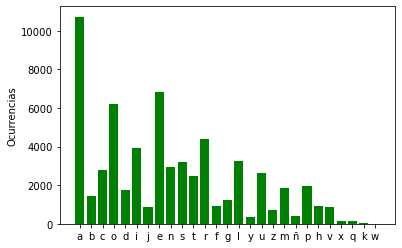

In [1]:
from collections import Counter
import re
from unicodedata import normalize
import matplotlib.pyplot as plt

data = open('0_palabras_todas.txt', encoding="utf8")
count = 0
words = []
chars = Counter()

while True:
    count +=1
    line = data.readline()
    line = line[:-1]

    if not line:
        break

    if (len(line) == 5):
        # -> NFD y eliminar diacríticos
        line = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", line), 0, re.I
    )

        # -> NFC
        line = normalize('NFC', line)
        words.append(line)
        chars.update(Counter(line))


chars.pop('O')
chars.pop('(')
chars.pop(' ')
print(chars)
print(len(words))
data.close()
plt.bar(list(chars.keys()), chars.values(), color='g')
plt.ylabel('Ocurrencias')
plt.show()

# get frequency
#https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l

In [77]:
import numpy as np

def remove_at(i, s):
    return s[:i] + s[i+1:]

def reduce_word_pool(wordlist, sel_word, pattern):
    '''
    Given a word and its pattern, reduce the list of possible words given that pattern.
    '''
    # First, we extract the ternary info from the word and the pattern, to see which letter we will ignore, etc..
    # Getting indeces:
    ind_gray = [i for i,x in enumerate(pattern) if x==0]
    ind_yellow = [i for i,x in enumerate(pattern) if x==1]
    ind_green = [i for i,x in enumerate(pattern) if x==2]
    ind_gray_yellow = [i for i,x in enumerate(pattern) if x==0 or x ==1]

    ignore = [sel_word[ind] for ind in ind_gray]
    present = [sel_word[ind] for ind in ind_yellow]
    correct = [sel_word[ind] for ind in ind_green]
    # ignore contains letters that are gray (we don't need the index)
    # present contains letters that are yellow (we will need to use also the index, maybe tuple or dict)
    # correct contains letters that are green (we will need to use also the index, maybe tuple or dict)

    # Loop
    new_wordlist = []
    for word in wordlist:
        char_list = ignore
        match = [characters in char_list for characters in word]
        if not any(match):
            # Now we have words that do not contain gray letters
            correct_pos = [word[ind] for ind in ind_green]
            if correct_pos == correct:
                # # Now we have words that have green chars in the respective position
                # # Pick the word, remove the char in the index pos of yellow and check if exists in the other chars
                
                # Second approach:
                # First check that yellow words are not in yellow positions
                present_pos = [word[ind] for ind in ind_yellow]
                match = [i for i, j in zip(present, present_pos) if i == j]
                print(present)
                print(present_pos)
                print(match)
                if not match:
                    # Now we are sure that there are no correct yellow words
                    # Now check that all the yellow letters appear in the other positions
                    print('la lista esta vacia:', match)
                    to_check = [word[ind] for ind in ind_gray_yellow]
                    flag = []
                    flag2 = 0
                    for elem in present:
                        for i in to_check:
                            if elem == i:
                                flag.append(True)
                        print(flag)
                        if not any(flag):
                            break
                        else:
                            flag = []
                            flag2 += 1
                    if len(present) == flag2:
                        new_wordlist.append(word)
                else:
                    print('la lista contiene elementos:', match)

    return new_wordlist

wordlist = ['cebra','hijos','realp', '12345', 'bicro']

a = reduce_word_pool(wordlist, 'barco', [2,0,1,1,2])
print(a)

['r', 'c']
['c', 'r']
[]
la lista esta vacia: []
[True]
[True]
['bicro']


In [79]:
wordlist = words
guess_word = 'jabon'
pattern = [2,0,0,0,0]

wordlist = reduce_word_pool(wordlist, guess_word, pattern)
print(wordlist)
print(len(wordlist))

[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
[]
[]
[]
la lista esta vacia: []
['jeliz', 'jemer', 'jeque', 'jerez', 'jetee', 'jetee', 'jigue', 'jimes', 'jiñes', 'jipie', 'jipie', 'jirel', 'juete', 'jugue', 'jumee', 'jumee', 'jumes', 'jumil', 'juñir', 'ju

In [4]:
def ternary_to_list(number):
    res = [0,0,0,0,0]
    len_number = len(str(number))
    for i in range(len_number): res[4-i] = int(str(number)[len_number-1-i]) 
    return res

def list_to_ternary(number):
    res = ""
    for i in range(len(number)): res += str(number[i])
    return int(res)

In [5]:
list_to_ternary([0,0,1,0,2])

102

In [6]:
ternary_to_list(102)

[0, 0, 1, 0, 2]

## Computing probabilities
There are $3^5$ possible patterns, as there are only 3 states and 5 squares.

In [7]:
import itertools

def dec_to_ternary(num):  #2
    quotient = num/3    #3
    remainder = num%3
    if quotient == 0:   #4
        return ""
    else:
        return dec_to_ternary(int(quotient)) + str(int(remainder)) 

def gen_patterns():
    '''
    This functions generates all of the possible pattern combinations.
    '''
    patterns_ter = []
    patterns_dec = [i for i in range(3**5)]
    a = [dec_to_ternary(n) for n in patterns_dec]
    a[0] = 0
    patterns_ter = [int(i) for i in a]
    return patterns_ter

patterns = gen_patterns()
pattern_grid = [ternary_to_list(pattern) for pattern in patterns]
print(pattern_grid)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 2], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 0, 1, 2], [0, 0, 0, 2, 0], [0, 0, 0, 2, 1], [0, 0, 0, 2, 2], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 0, 2], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 0, 1, 1, 2], [0, 0, 1, 2, 0], [0, 0, 1, 2, 1], [0, 0, 1, 2, 2], [0, 0, 2, 0, 0], [0, 0, 2, 0, 1], [0, 0, 2, 0, 2], [0, 0, 2, 1, 0], [0, 0, 2, 1, 1], [0, 0, 2, 1, 2], [0, 0, 2, 2, 0], [0, 0, 2, 2, 1], [0, 0, 2, 2, 2], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 0, 2], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 0, 1, 2], [0, 1, 0, 2, 0], [0, 1, 0, 2, 1], [0, 1, 0, 2, 2], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 0, 2], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 2], [0, 1, 1, 2, 0], [0, 1, 1, 2, 1], [0, 1, 1, 2, 2], [0, 1, 2, 0, 0], [0, 1, 2, 0, 1], [0, 1, 2, 0, 2], [0, 1, 2, 1, 0], [0, 1, 2, 1, 1], [0, 1, 2, 1, 2], [0, 1, 2, 2, 0], [0, 1, 2, 2, 1], [0, 1, 2, 2, 2], [0, 2, 0, 0, 0], [0, 2, 0, 0, 1], [0, 2, 0, 0, 2], [0, 2, 0, 1, 0], [0, 2, 0, 1, 

In [8]:
# Probabilities
word_pool = words
word = 'laser'
probabilities = []
for pattern in pattern_grid:
    a = reduce_word_pool(word_pool,word,pattern)
    p = len(a)/len(word_pool)
    probabilities.append(p)
print(probabilities)
print('probability sum:',sum(probabilities))
probability = np.mean(probabilities)
entropy = -np.log2(probability)

print(probability)
print(entropy)

[0.03765657206278738, 0.02933248771206596, 0.004201680672268907, 0.05406690978278104, 0.11407959410179166, 0.003329633740288568, 0.029491041699698746, 0.007293483431108292, 0.003329633740288568, 0.008006976375455842, 0.03250356746472174, 0.0003963849690819724, 0.09172348184556842, 0.15831615665133977, 0.004360234659901697, 0.01609322974472808, 0.013952750911685428, 0.00023783098144918344, 0.006104328523862375, 0.0010306009196131283, 0.0003963849690819724, 0.00776914539400666, 0.007848422387823054, 7.927699381639449e-05, 0.00531155858569843, 0.0006342159505311559, 0.00015855398763278897, 0.11756778182971302, 0.2069129538607896, 0.01752021563342318, 0.2341842397336293, 0.40677025527192007, 0.01379419692405264, 0.015855398763278898, 0.02489297605834787, 0.00015855398763278897, 0.1821785317900745, 0.28809259552877753, 0.021325511336610117, 0.36475344854923103, 0.5753131441255748, 0.019739971460282228, 0.043443792611384174, 0.0459806564135088, 0.0004756619628983669, 0.013159980973521484, 0.

In [4]:
word_pool = words
pattern = [2,0,0,0,0]
word = 'laser'
new_pool = reduce_word_pool(word_pool, word, pattern)
print(new_pool)
print(len(new_pool))

['libio', 'libon', 'lichi', 'licio', 'licuo', 'licuo', 'licuo', 'lidio', 'lidio', 'lidon', 'light', 'ligio', 'ligon', 'lilio', 'limbo', 'limon', 'lindo', 'lindo', 'linio', 'linon', 'lipon', 'litio', 'lituo', 'liudo', 'liudo', 'llovi', 'lobby', 'lodon', 'loino', 'lolio', 'lombo', 'lonco', 'longo', 'lotin', 'lucho', 'lucho', 'lucid', 'lucio', 'lucio', 'ludid', 'ludio', 'ludio', 'luido', 'lumbo', 'lunch', 'luzco']
46
